# Проверка адекватности

In [6]:
import matplotlib.pyplot as plt
import math as m
import numpy as np

In [21]:
def get_pn(n, lam, mu):
    alpha = (m.sqrt(1 + 4 * lam / mu) - 1) / 2
    p0 = (lam * (1 - alpha)) / (lam + mu * (1 - alpha))

    if n == -1:  # 0' case server is waiting
        return (mu / lam) * p0

    return (alpha**n) * p0

#### Функция для получения среднего времени пребывания в системе

In [19]:
def average_time_in_system(lam, mu):
    alpha = (m.sqrt(1 + 4 * lam / mu) - 1) / 2
    self_L_q = (lam * alpha) / ((1 - alpha) * (lam + mu * (1 - alpha))) 
    return (self_L_q / lam)  + (1 / mu)  # it's W_s

#### Функция для получения вероятности ожидания

In [14]:
def probability_of_waiting(lam, mu):
    return 1 - get_pn(-1, lam, mu)

#### Функция для получения среднего количества заявок в очереди

In [17]:
def average_clients_in_queue(lam, mu):
    alpha = (m.sqrt(1 + 4 * lam / mu) - 1) / 2
    return (lam * alpha) / ((1 - alpha) * (lam + mu * (1 - alpha)))  # it's L_q

# 1. Рассмотрим случай для <mi>&#x3BB;</mi> < <mi>&#x3BC;</mi> * K

# <mi>&#x3BC;</mi> = 5, <mi>&#x3BB;</mi> от 0 до 10, K = 2

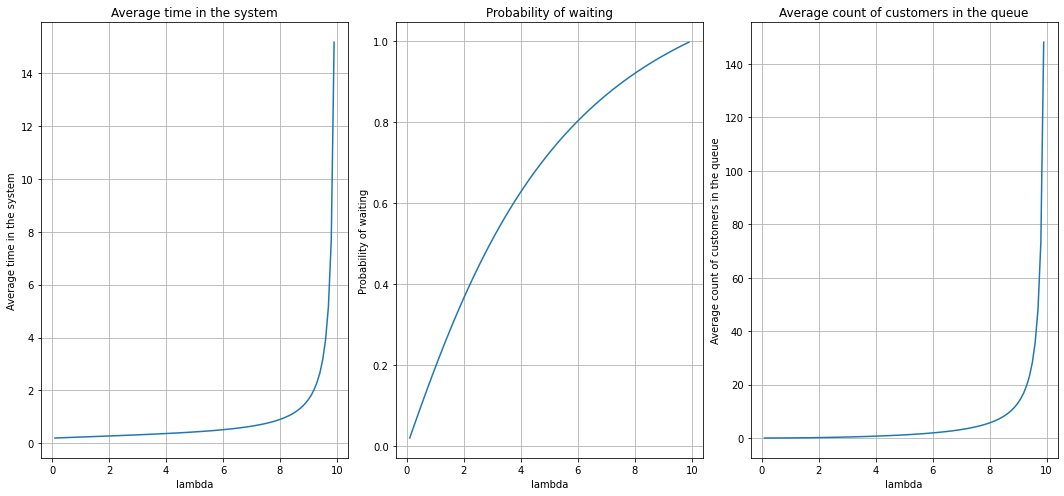

In [24]:
x = np.linspace(0.1, 9.9, 99)
y = []
for i in x:
    y.append([average_time_in_system(mu=5, lam=i), probability_of_waiting(mu=5, lam=i),
    average_clients_in_queue(mu=5, lam=i), 'baNANa'])

titles = ['Average time in the system', 'Probability of waiting', 'Average count of customers in the queue', '------------------']
plt.figure(figsize=(15,7))
for j in range(3):
    plt.subplot(1, 3, j+1)
    plt.title(titles[j])
    plt.xlabel('lambda')
    plt.ylabel(titles[j])
    plt.tight_layout()
    plt.grid()
    plt.plot(x, [i[j] for i in y])

# <mi>&#x3BC;</mi> от 1 до 12.5, <mi>&#x3BB;</mi> = 25, K = 2

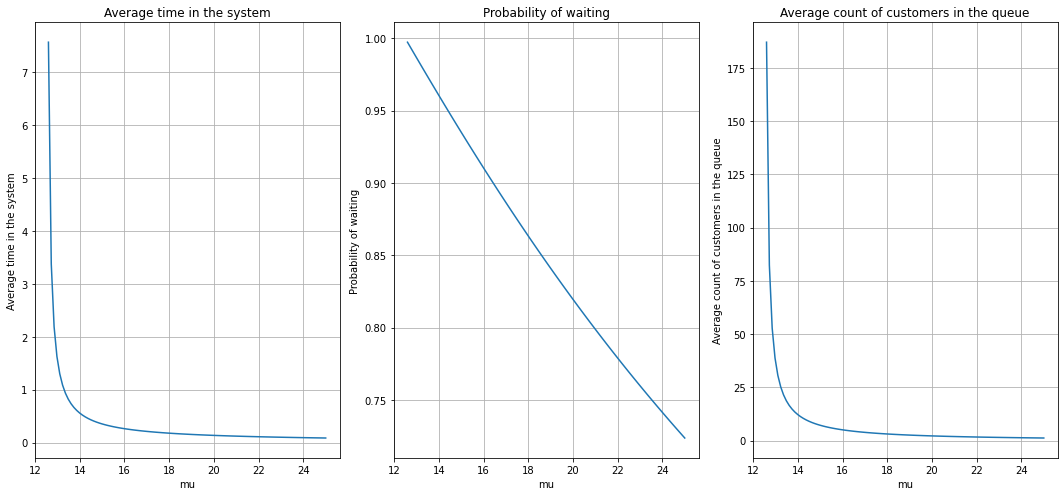

In [27]:
y = []
x = np.linspace(12.6, 25, 99)
for i in x:
    y.append([average_time_in_system(mu=i, lam=25), probability_of_waiting(mu=i, lam=25),
    average_clients_in_queue(mu=i, lam=25), 'baNANa'])

titles = ['Average time in the system', 'Probability of waiting', 'Average count of customers in the queue', '------------------']
plt.figure(figsize=(15,7))
for j in range(3):
    plt.subplot(1, 3, j+1)
    plt.title(titles[j])
    plt.xlabel('mu')
    plt.ylabel(titles[j])
    plt.tight_layout()
    plt.grid()
    plt.plot(x, [i[j] for i in y])

# 2. Рассмотрим случай для <mi>&#x3BB;</mi> >= <mi>&#x3BC;</mi> * K